In [43]:
import cv2
import os

def crop_grid(image, cell_width, cell_height, x_offset=0, y_offset=0):
    img_height, img_width = image.shape[:2]
    
    # Calculate the number of cells in each dimension
    cols = img_width // cell_width
    rows = img_height // cell_height

    # Store cropped cells
    cells = []

    for i in range(rows):
        for j in range(cols):
            # Calculate crop coordinates
            x_start, y_start = j * cell_width, i * cell_height
            x_end, y_end = x_start + cell_width, y_start + cell_height
            
            # Crop the cell and add to the list
            cell = image[
                   y_start+y_offset:y_end+y_offset,
                   x_start+x_offset:x_end+x_offset
            ]
            cells.append(cell)
    
    return cells

def center_symbol(cell):
    # Find coordinates of all white pixels (assuming white is 255)
    white_pixels = np.argwhere(cell == 255)
    
    # Get bounding box of the white symbol
    (y_min, x_min), (y_max, x_max) = white_pixels.min(axis=0), white_pixels.max(axis=0)
    
    # Crop the bounding box region containing the symbol
    symbol = cell[y_min:y_max+1, x_min:x_max+1]
    
    # Create a new blank (black) cell of the same size
    centered_cell = np.zeros_like(cell)
    
    # Calculate position to center the symbol
    center_y = (cell.shape[0] - symbol.shape[0]) // 2
    center_x = (cell.shape[1] - symbol.shape[1]) // 2
    
    # Place the symbol in the center of the black background
    centered_cell[center_y:center_y + symbol.shape[0], center_x:center_x + symbol.shape[1]] = symbol
    
    return centered_cell

def center_symbols_in_cells(cells):
    # Apply centering to each cell
    centered_cells = [center_symbol(cell) for cell in cells]
    return centered_cells

def resize_cells(cells, target_width, target_height):
    resized_cells = []
    for cell in cells:
        # Resize each cell to the target dimensions
        resized_cell = cv2.resize(cell, (target_width, target_height), interpolation=cv2.INTER_AREA)
        resized_cells.append(resized_cell)
    return resized_cells

def display_cells(cells, cols):
    # Calculate rows based on the number of cells and columns
    rows = len(cells) // cols + int(len(cells) % cols != 0)
    
    # Set up the plot grid
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.ravel()  # Flatten to make it easy to index

    # Plot each cell in the grid
    for i, cell in enumerate(cells):
        axes[i].imshow(cell, cmap="gray")
        axes[i].axis("off")  # Hide axis for better visibility

    # Hide any remaining empty subplots if the cell count doesn't fill the grid
    for j in range(i + 1, rows * cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()
    
def save_cells(cells, folder_path):
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)
    
    for i, cell in enumerate(cells):
        file_path = os.path.join(folder_path, f"{i}.jpg")
        
        # Save the image
        cv2.imwrite(file_path, cell)

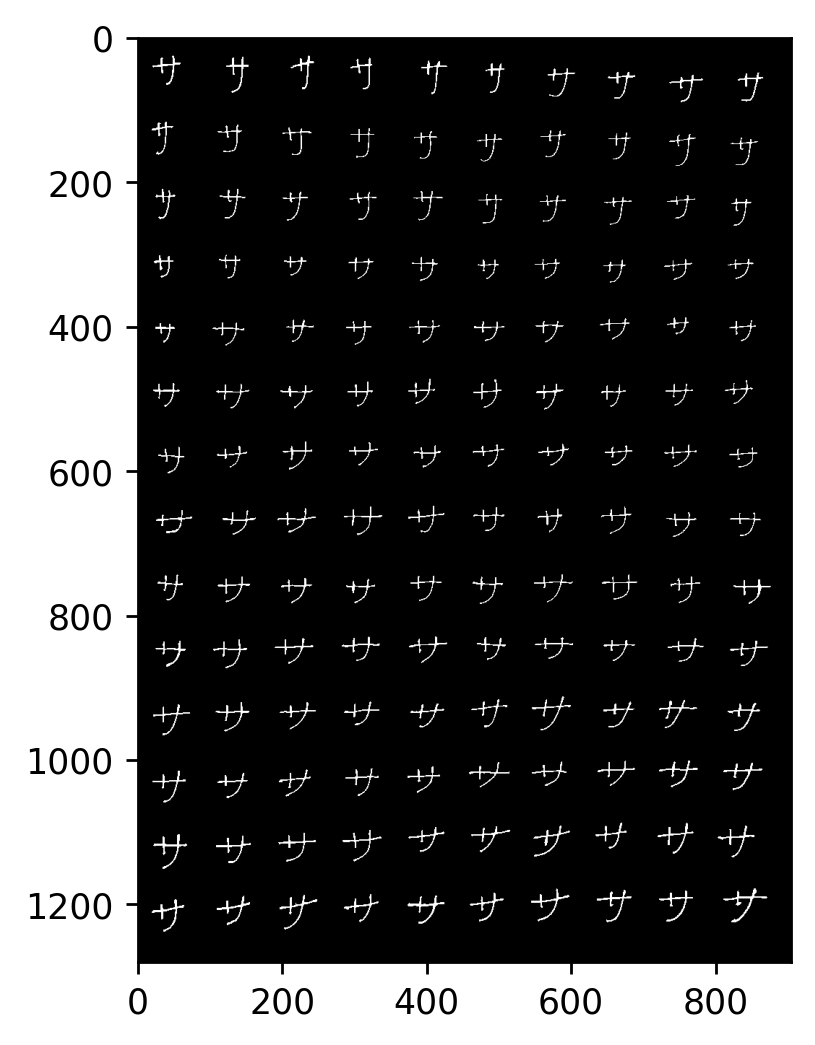

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

TILE_SIZE = 90
plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250

file_name = '../data-prepared/0.jpg'
source_img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
plt.imshow(source_img, cmap='gray')

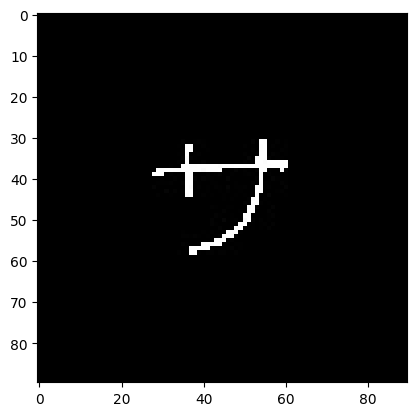

In [45]:
import random
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

cells = crop_grid(source_img, cell_width=TILE_SIZE, cell_height=TILE_SIZE)
cells = center_symbols_in_cells(cells)

plt.imshow(random.choice(cells), cmap='gray')

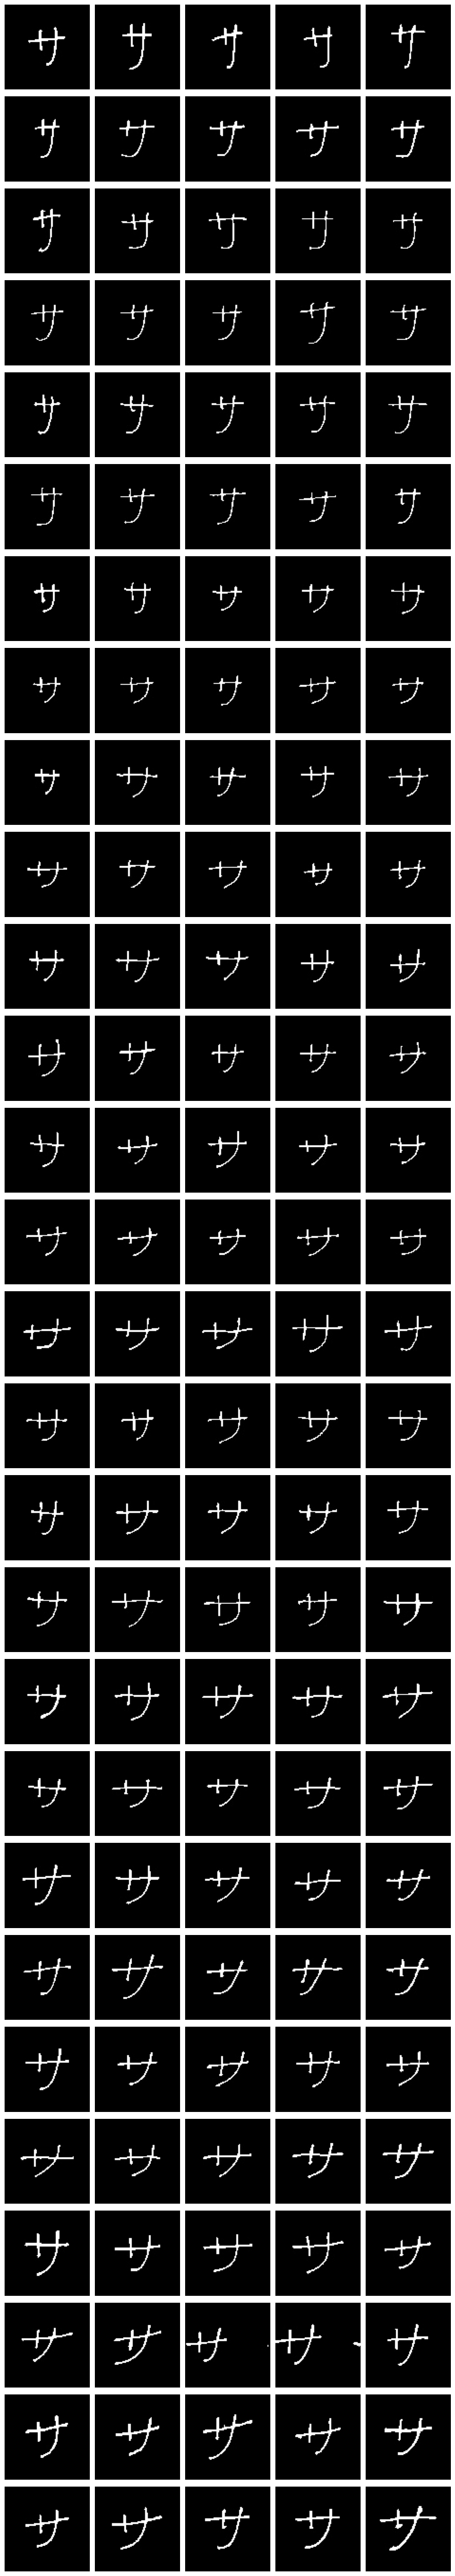

In [46]:
display_cells(cells, cols=5)
save_cells(cells, '../dataset/0')

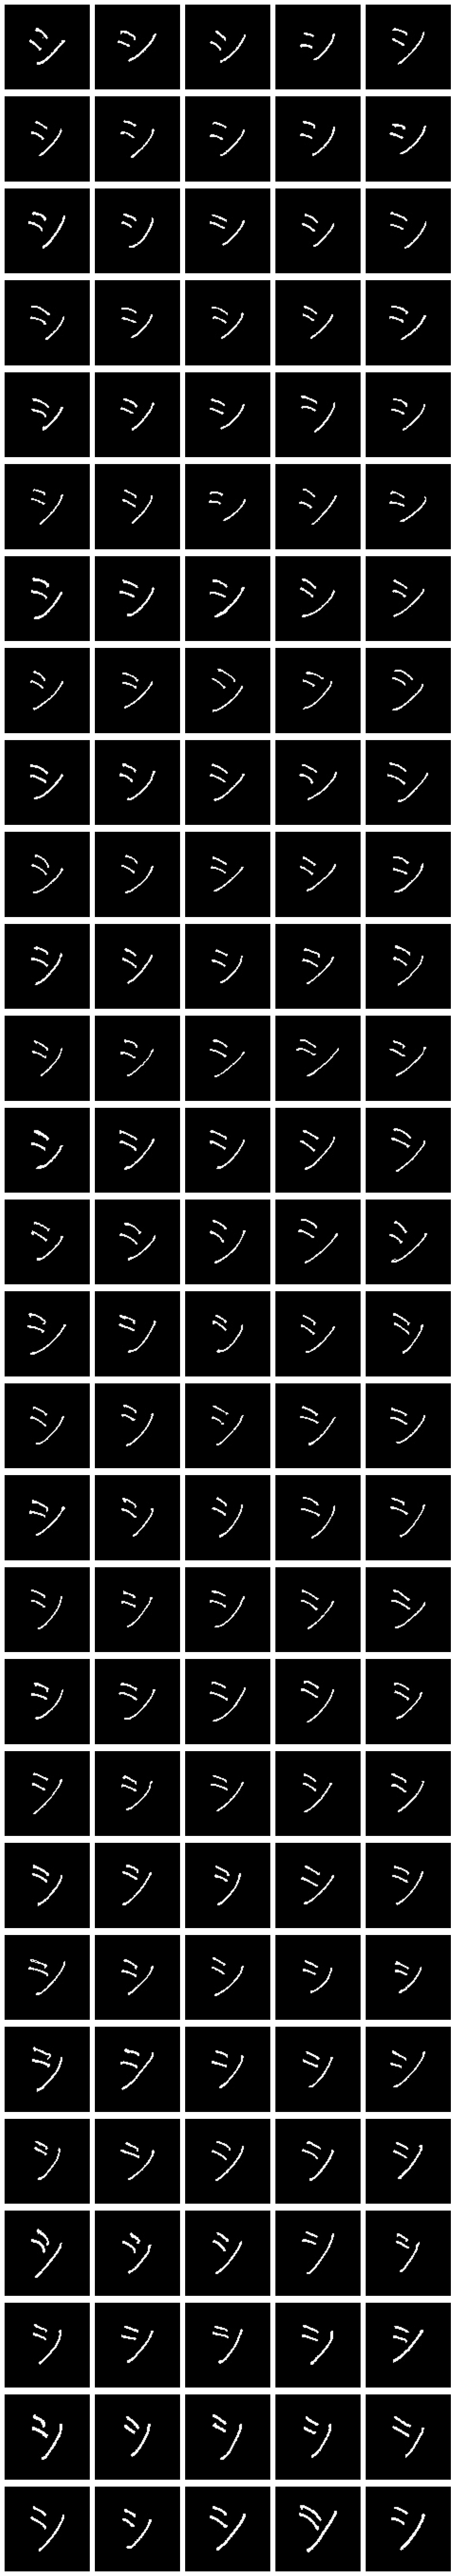

In [47]:
file_name = '../data-prepared/1.jpg'
source_img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
cells = crop_grid(source_img, cell_width=TILE_SIZE, cell_height=TILE_SIZE)
cells = center_symbols_in_cells(cells)

display_cells(cells, cols=5)
save_cells(cells, '../dataset/1')

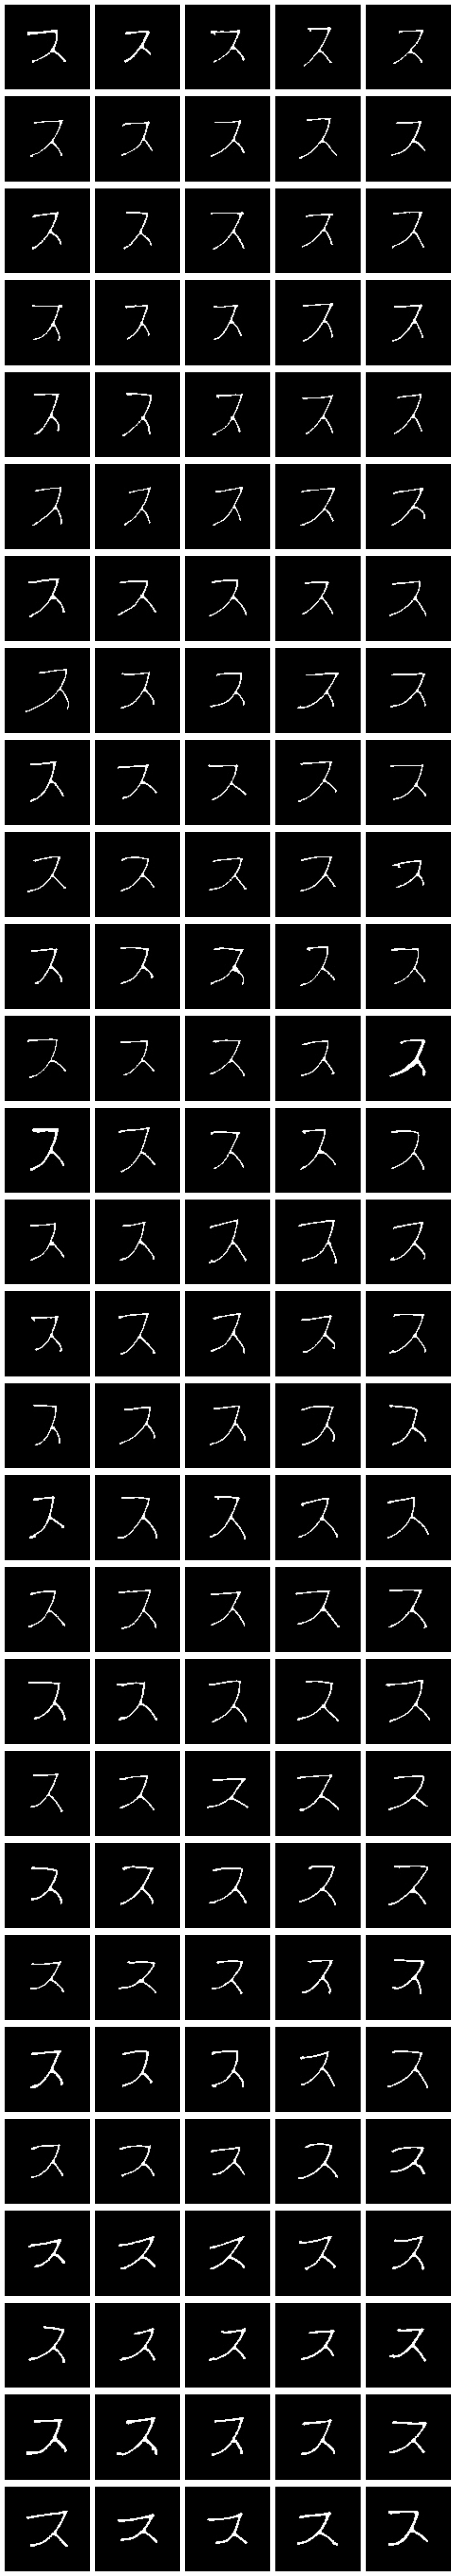

In [48]:
file_name = '../data-prepared/2.jpg'
source_img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
cells = crop_grid(source_img, cell_width=TILE_SIZE, cell_height=TILE_SIZE)
cells = center_symbols_in_cells(cells)

display_cells(cells, cols=5)
save_cells(cells, '../dataset/2')

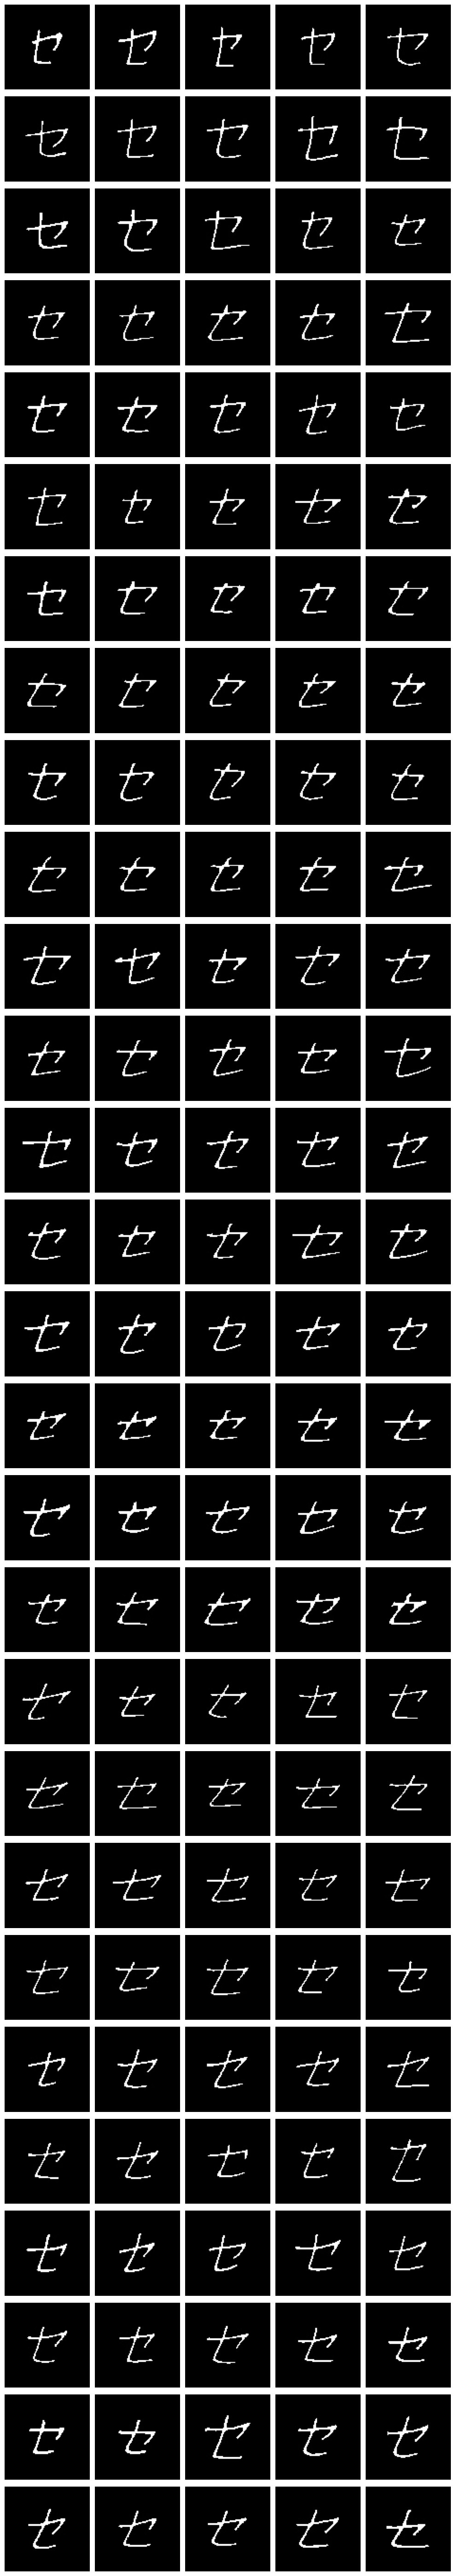

In [49]:
file_name = '../data-prepared/3.jpg'
source_img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
cells = crop_grid(source_img, cell_width=TILE_SIZE, cell_height=TILE_SIZE)
cells = center_symbols_in_cells(cells)

display_cells(cells, cols=5)
save_cells(cells, '../dataset/3')

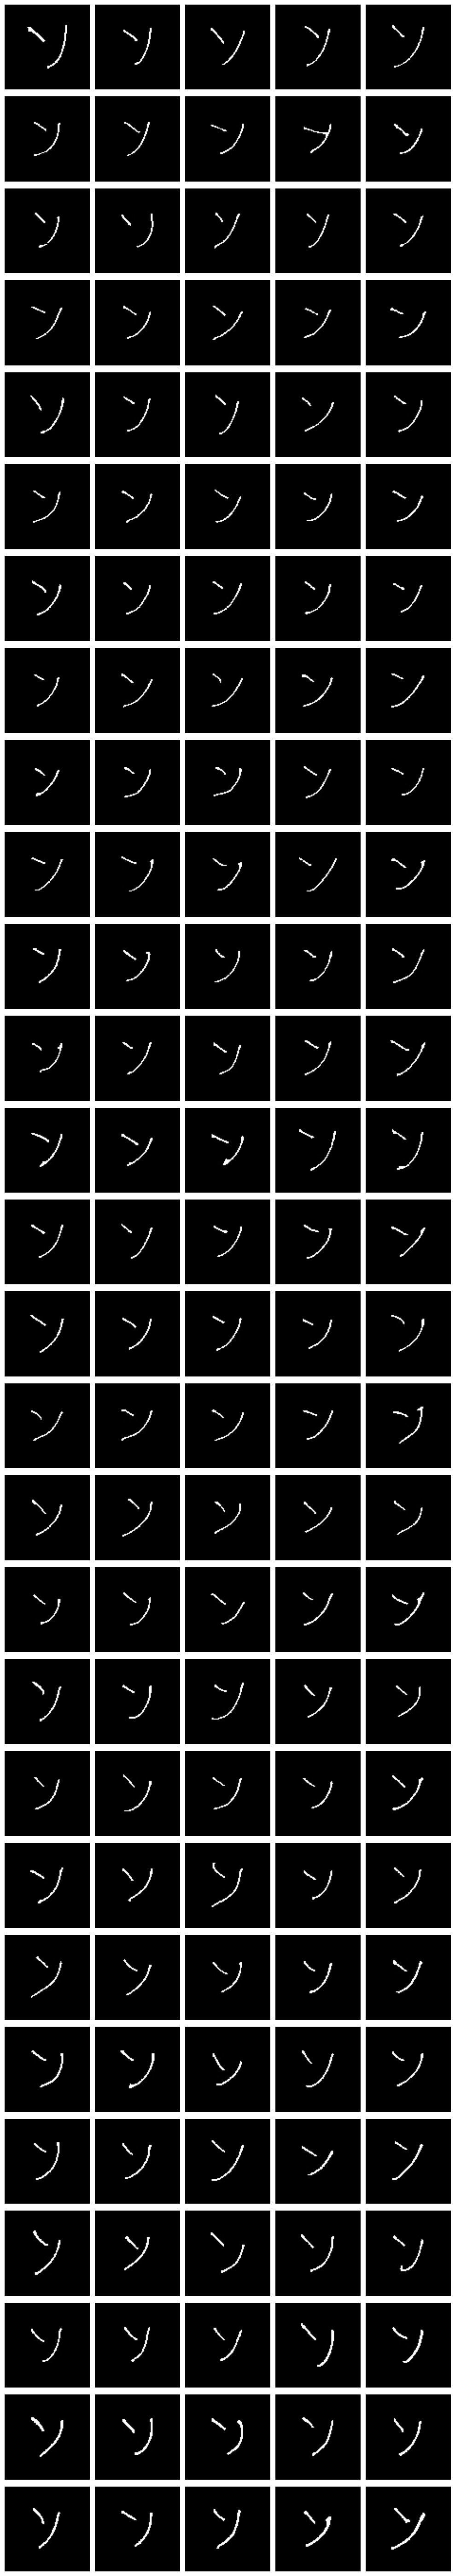

In [50]:
file_name = '../data-prepared/4.jpg'
source_img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
cells = crop_grid(source_img, cell_width=TILE_SIZE, cell_height=TILE_SIZE)
cells = center_symbols_in_cells(cells)

display_cells(cells, cols=5)
save_cells(cells, '../dataset/4')